In [4]:
from IPython.display import display, HTML
import numpy as np
import pandas as pd
import seaborn as sns
from simulation.models.single_codon import single_codon
from matplotlib import rcParams
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
def read_sim(path_pref, seed_start=1, seed_end=3, seed_incr=1):
    """ 
    Reads in output for an arbitrary number of simulation trials 
    (with different seeds) and concatenates results into a single
    dataset.
    """
    df_master = pd.read_csv(f"{path_pref}_{seed_start}.tsv", sep="\t")
    df_master["seed"] = str(seed_start)
    for i in range(seed_start+1, seed_end+1):
        tmp = pd.read_csv(f"{path_pref}_{i}.tsv", sep="\t")
        tmp["seed"] = str(i)
        df_master = df_master.append(tmp, ignore_index=True)
    return df_master

def tRNA_species_plot(df):
    df_fil = df[(df.species == "TTT_charged") | (df.species == "TTT_uncharged")]
    sns.lineplot(x="time", y="protein", units="seed", hue="species", estimator=None, data=df_fil)
    
def ribosome_plot(df):
    df_fil = df[(df.species == "__ribosome")]
    sns.lineplot(x="time", y="protein", units="seed", estimator=None, data=df_fil, color="g")

In [6]:
def get_average_protein(path_pref, chrg_rate, intervals, max_seed):
    df_master = pd.read_csv(f"{path_pref}_{chrg_rate}_10000.0_1.tsv", sep="\t")
    df_master["seed"] = str(1)
    for i in range(2, max_seed+1):
        tmp = pd.read_csv(f"{path_pref}_{chrg_rate}_10000.0_{i}.tsv", sep="\t")
        tmp["seed"] = str(i)
        df_master = df_master.append(tmp, ignore_index=True)
    
    df_master["time"] = df_master["time"].apply(np.ceil)
    df_master = df_master.loc[df_master['time'].isin(intervals)].groupby(["time", "species"])["protein"].mean().reset_index()
    df_master["charging_rate"] = chrg_rate
    return df_master

In [7]:
rcParams['figure.figsize'] = [10, 5]

Initial conditions:
- 100 charged tRNAs
- 100 free ribosomes
- 400 mRNA transcripts
- RBS strength - 1e6
- charging rate - 1e2

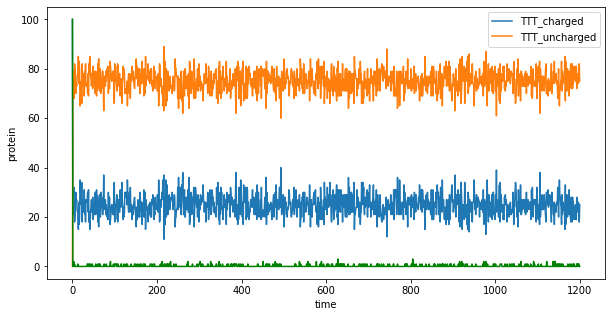

In [39]:
df_master = read_sim("../output/test/fixed_transcript_400_100.0", 1, 1, 1)
tRNA_species_plot(df_master)
ribosome_plot(df_master)

Initial conditions:
- 100 charged tRNAs
- 100 free ribosomes
- 200 mRNA transcripts
- RBS strength - 1e6
- charging rate - 1e2

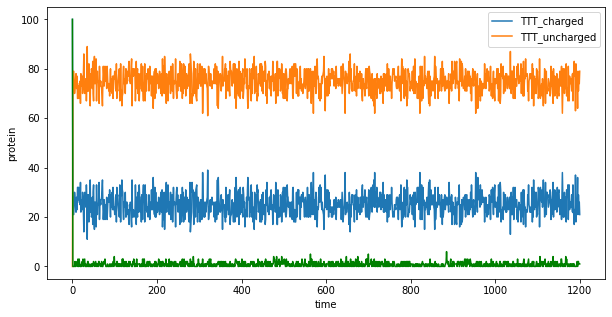

In [40]:
df_master = read_sim("../output/test/fixed_transcript_200_100.0", 1, 1, 1)
tRNA_species_plot(df_master)
ribosome_plot(df_master)

Initial conditions:
- 100 charged tRNAs
- 100 free ribosomes
- 200 mRNA transcripts
- RBS strength - 1e3
- charging rate - 1e2

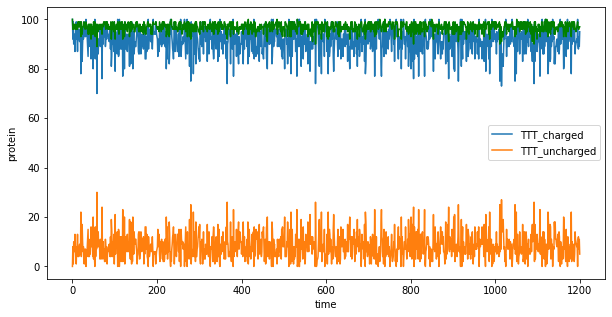

In [41]:
df_master = read_sim("../output/test/fixed_transcript_200_100.0_1000.0", 1, 1, 1)
tRNA_species_plot(df_master)
ribosome_plot(df_master)

Initial conditions:
- 100 charged tRNAs
- 100 free ribosomes
- 200 mRNA transcripts
- RBS strength - 1e4
- charging rate - 1e2

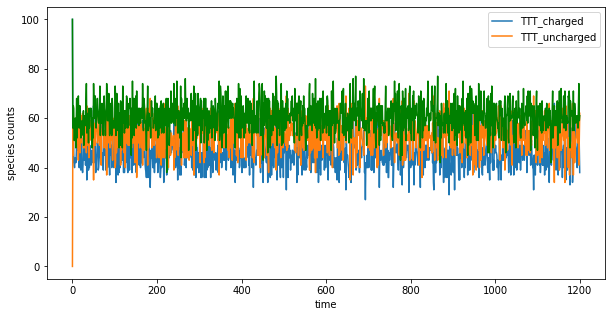

In [7]:
df_master = read_sim("../output/test/fixed_transcript_200_100.0_10000.0", 1, 1, 1)
tRNA_species_plot(df_master)
ribosome_plot(df_master)
plt.ylabel("species counts")
#plt.savefig("fixed_trans_plot.png")

In [8]:
chrg_rates = [1.0, 2.5, 5.0, 7.5, 10.0, 25.0, 50.0, 75.0, 100.0, 250.0, 500.0, 750.0, 1000.0, 2500.0, 5000.0, 7500.0, 10000.0]
intervals = [1.0, 10.0, 100.0, 500.0, 1000.0, 2000.0, 3000.0, 4000.0, 5000.0]
path_pref = "../output/fixed/fixed_transcript_200"
df_master = get_average_protein(path_pref, 10.0, intervals, 3)
for rate in chrg_rates:
    tmp = get_average_protein(path_pref, rate, intervals, 3)
    df_master = df_master.append(tmp, ignore_index=True)
df_master

,time,species,protein,charging_rate
0,1.0,TTT_charged,5.000000,10.0
1,1.0,TTT_uncharged,95.000000,10.0
2,1.0,__proteinX_rbs,190.000000,10.0
3,1.0,__ribosome,51.000000,10.0
4,1.0,proteinX,0.000000,10.0
...,...,...,...,...
800,5000.0,TTT_charged,99.666667,10000.0
801,5000.0,TTT_uncharged,0.333333,10000.0
802,5000.0,__proteinX_rbs,198.666667,10000.0
803,5000.0,__ribosome,76.666667,10000.0


Initial conditions:
- 100 charged tRNAs
- 100 free ribosomes
- 200 mRNA transcripts
- RBS strength - 1e4
- charging rate 1e1 - 1e4

<AxesSubplot:xlabel='charging_rate', ylabel='protein'>

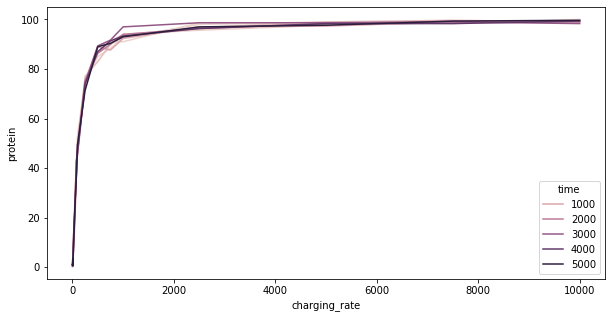

In [9]:
df_fil = df_master[(df_master.species == "TTT_charged")]
sns.lineplot(x="charging_rate", y="protein", hue="time", estimator=None, data=df_fil)

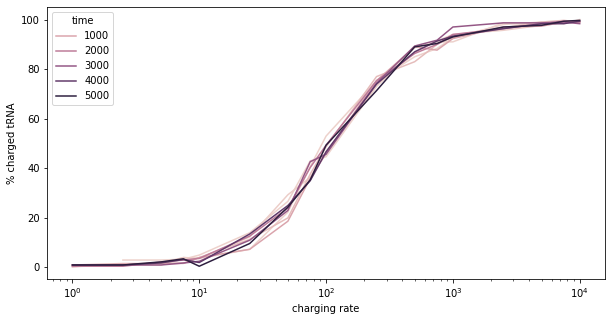

In [11]:
rcParams['figure.figsize'] = [10, 5]
df_fil = df_master[(df_master.species == "TTT_charged")]
sns.lineplot(x="charging_rate", y="protein", hue="time", estimator=None, data=df_fil)
plt.xscale("log")
plt.ylabel("% charged tRNA")
plt.xlabel("charging rate")
plt.savefig("report_figs/charging_rate.png")

In [15]:
def read_sim(path_pref, seed_start=1, seed_end=3, seed_incr=1, time_limit=None):
    """ 
    Reads in output for an arbitrary number of simulation trials 
    (with different seeds) and concatenates results into a single
    dataset.
    """
    df_master = pd.read_csv(f"{path_pref}_{seed_start}.tsv", sep="\t")
    df_master["seed"] = str(seed_start)
    for i in range(seed_start+1, seed_end+1):
        tmp = pd.read_csv(f"{path_pref}_{i}.tsv", sep="\t")
        tmp["seed"] = str(i)
        df_master = df_master.append(tmp, ignore_index=True)
    if time_limit is not None:
        df_master = df_master[df_master.time < time_limit]
    return df_master

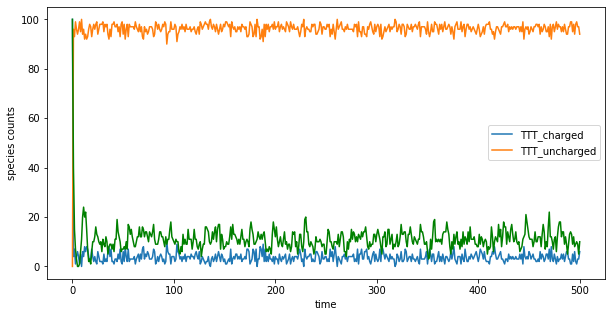

In [17]:
df_master = read_sim("../output/fixed/fixed_transcript_200_10.0_10000.0", 1, 1, 1, 500)
tRNA_species_plot(df_master)
ribosome_plot(df_master)
plt.ylabel("species counts")
#plt.savefig("fixed_trans_plot.png")